In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [4]:
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<AxesSubplot:>

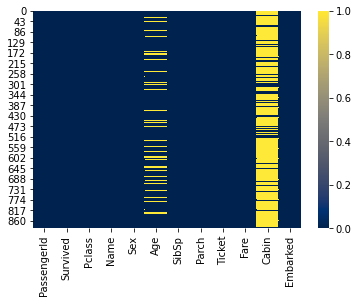

In [8]:
#checking missing values 
sns.heatmap(df.isnull(),yticklabels='auto',cmap='cividis')
#cabin values are missing
#Age values are missing

<AxesSubplot:>

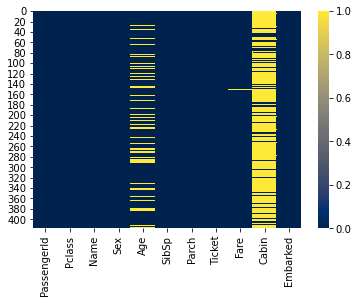

In [9]:
sns.heatmap(df_test.isnull(),yticklabels='auto',cmap='cividis')
#cabin values are missing
#Age values are missing

In [10]:
#the one value from fare in test and train data set is missing.finding out which value is that
df_test['Fare'].unique()

array([  7.8292,   7.    ,   9.6875,   8.6625,  12.2875,   9.225 ,
         7.6292,  29.    ,   7.2292,  24.15  ,   7.8958,  26.    ,
        82.2667,  61.175 ,  27.7208,  12.35  ,   7.225 ,   7.925 ,
        59.4   ,   3.1708,  31.6833,  61.3792, 262.375 ,  14.5   ,
        61.9792,  30.5   ,  21.6792,  31.5   ,  20.575 ,  23.45  ,
        57.75  ,   8.05  ,   9.5   ,  56.4958,  13.4167,  26.55  ,
         7.85  ,  13.    ,  52.5542,  29.7   ,   7.75  ,  76.2917,
        15.9   ,  60.    ,  15.0333,  23.    , 263.    ,  15.5792,
        29.125 ,   7.65  ,  16.1   ,  13.5   ,   7.725 ,  21.    ,
         7.8792,  42.4   ,  28.5375, 211.5   ,  25.7   ,  15.2458,
       221.7792,  10.7083,  14.4542,  13.9   ,   7.775 ,  52.    ,
         7.7958,  78.85  ,   7.8542,  55.4417,   8.5167,  22.525 ,
         7.8208,   8.7125,  15.0458,   7.7792,  31.6792,   7.2833,
         6.4375,  16.7   ,  75.2417,  15.75  ,   7.25  ,  23.25  ,
        28.5   ,  25.4667,  46.9   , 151.55  ,  18.    ,  51.8

In [11]:
print (df_test[df_test.Fare.isnull()])
#the fare value from pclass 3 is missing


     PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN   NaN        S  


In [12]:
#checking mean fare value of pclass 3
df_test[df_test['Pclass' ]== 3]['Fare'].mean()

12.459677880184334

In [13]:
#filling nan value with mean value in fare column
df_test['Fare'].fillna(df_test[df_test['Pclass' ]== 3]['Fare'].mean(),inplace=True)

In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

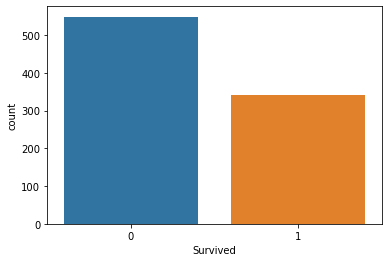

In [15]:
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

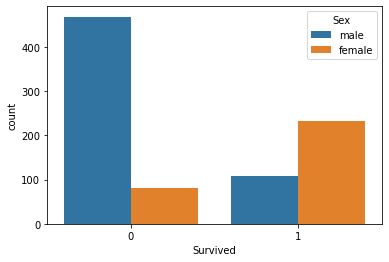

In [16]:
#using count plot visualizing no of survived passengers based on sex
sns.countplot(x='Survived',hue='Sex',data=df)
#female passengers are the most of the survivers

<AxesSubplot:xlabel='Survived', ylabel='count'>

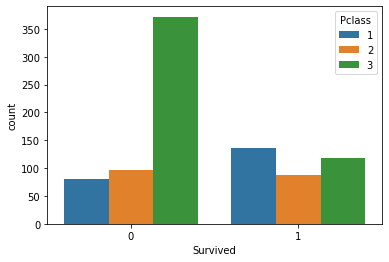

In [17]:
#using count plot visualizing no of survived passengers based on Pclass
sns.countplot(x='Survived',hue='Pclass',data=df)
#most of the 3rd class passengers are not survived`

<AxesSubplot:xlabel='Age'>

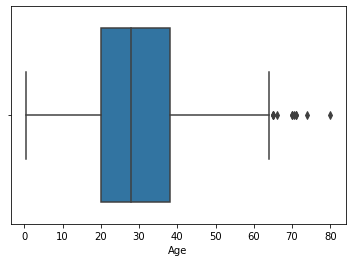

In [18]:
sns.boxplot(x=df['Age'].dropna())
#most of the passengers age is in between 20 to 40

<AxesSubplot:xlabel='Survived', ylabel='count'>

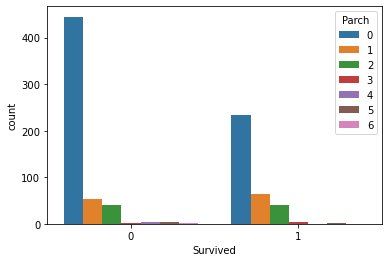

In [19]:
#checking survived based on parch (parents and childern abroad)
sns.countplot(x='Survived',hue='Parch',data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

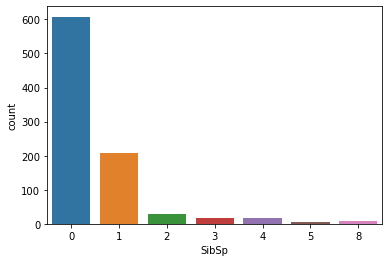

In [20]:
sns.countplot(x='SibSp',data=df)
#most of the passengers are alone travellers

<AxesSubplot:xlabel='Survived', ylabel='count'>

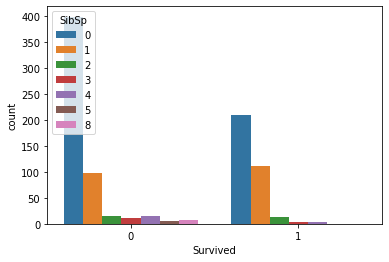

In [21]:
#checking survived based on parch (siblings / spouses )
sns.countplot(x='Survived',hue='SibSp',data=df)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

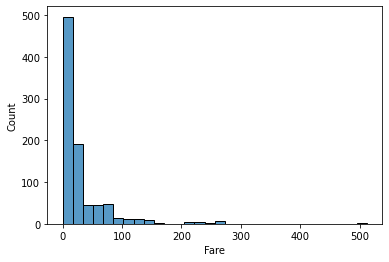

In [22]:
#using histogram visualizing the count of ticket fare
sns.histplot(x=df['Fare'],kde=False,bins=30)
#most of the passengers are low fare travellers

In [23]:
pd.crosstab([df['Pclass'],df['SibSp']],columns=df['Survived'])

Survived        0   1
Pclass SibSp         
1      0       60  77
       1       18  53
       2        1   4
       3        1   2
2      0       70  50
       1       23  32
       2        4   4
       3        0   1
3      0      268  83
       1       56  27
       2       10   5
       3       11   1
       4       15   3
       5        5   0
       8        7   0

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

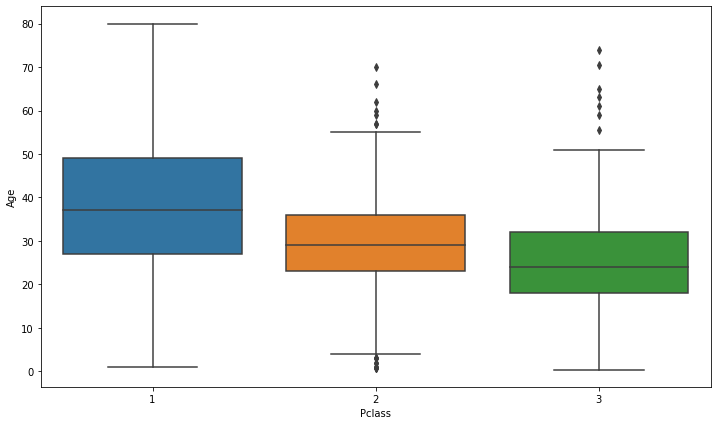

In [24]:
#Data cleaning
#most of age value is missing so filling age out by the median age of the pclass

plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df)

In [25]:
#The median age of pclass 1 is 37,pclass 2 is 29 and pclass 3 is 25 Creating a function to fill the missing age values

def fill_age(col):
    Age=col[0]
    Pclass=col[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [26]:
#applying age with apply function
df['Age'] = df[['Age','Pclass']].apply(fill_age,axis=1)
#applying age to test data with apply function
df_test['Age'] = df_test[['Age','Pclass']].apply(fill_age,axis=1)

In [27]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [28]:
df_test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            418
SibSp          418
Parch          418
Ticket         418
Fare           418
Cabin           91
Embarked       418
dtype: int64

<AxesSubplot:>

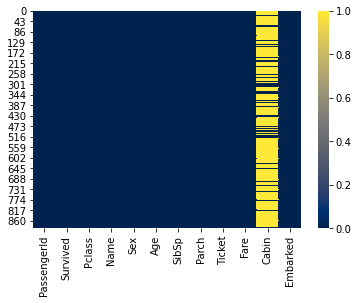

In [29]:
sns.heatmap(df.isnull(),yticklabels='auto',cmap='cividis')

<AxesSubplot:>

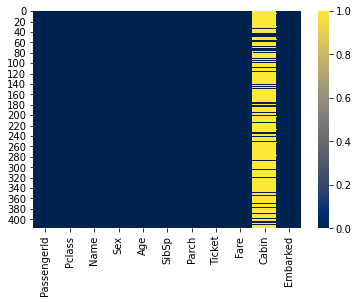

In [30]:
sns.heatmap(df_test.isnull(),yticklabels='auto',cmap='cividis')

In [31]:
#droping cabin for both train and test data
df.drop('Cabin',axis=1,inplace=True)
df_test.drop('Cabin',axis=1,inplace=True)

In [32]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Embarked       889
dtype: int64

In [33]:
df.dropna(inplace=True)

In [34]:
df.count()

PassengerId    889
Survived       889
Pclass         889
Name           889
Sex            889
Age            889
SibSp          889
Parch          889
Ticket         889
Fare           889
Embarked       889
dtype: int64

In [35]:
df_test.dropna(inplace=True)

In [36]:
df_test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            418
SibSp          418
Parch          418
Ticket         418
Fare           418
Embarked       418
dtype: int64

In [37]:
df.info()
#need to drop name,fare,ticket
#converting to variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [38]:
Sex=pd.get_dummies(df['Sex'],drop_first=True)
Embarked=pd.get_dummies(df['Embarked'],drop_first=True)

In [39]:
#droping name,sex,ticket,embarked,passenger id
df.drop(['Sex','Name','Ticket','Embarked'],axis=1,inplace=True)

In [40]:
#concat the dummy varibales of sex and Embarked to main data frame
df=pd.concat([df,Sex,Embarked],axis=1)

In [41]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [42]:
#clearng up the test data
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [43]:
df_test.dropna(inplace=True)

In [44]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 35.9+ KB


In [45]:
Sex=pd.get_dummies(df_test['Sex'],drop_first=True)
Embarked = pd.get_dummies(df_test['Embarked'],drop_first=True)

In [46]:
#droping values
df_test.drop(['Sex','Name','Ticket','Embarked'],axis=1,inplace=True)

In [47]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


In [48]:
#concating the sex and embarked in test data frame
df_test=pd.concat([df_test,Sex,Embarked],axis=1)

In [49]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_val, y_train, y_val = train_test_split(df.drop(['Survived','PassengerId'],axis=1), 
                                                    df['Survived'], test_size=0.20, 
                                                    random_state=101)

In [52]:
##Building a Logistic Regression model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='liblinear')

In [53]:
log_model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [54]:
predictions_log_model =log_model.predict(X_val)

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_val,predictions_log_model))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       107
           1       0.83      0.63      0.72        71

    accuracy                           0.80       178
   macro avg       0.81      0.77      0.78       178
weighted avg       0.81      0.80      0.80       178



In [57]:
X_test = df_test.drop('PassengerId',axis=1)

In [58]:
predictions_test_model_log = log_model.predict(X_test)

In [59]:
predictions_test_model_log

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [60]:
print(classification_report(y_val,predictions_log_model))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       107
           1       0.83      0.63      0.72        71

    accuracy                           0.80       178
   macro avg       0.81      0.77      0.78       178
weighted avg       0.81      0.80      0.80       178



In [61]:
#decision tree model
from sklearn.tree import DecisionTreeClassifier

In [62]:
dtc = DecisionTreeClassifier()

In [63]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [64]:
predictions_tree_model =dtc.predict(X_val)

In [65]:
print(classification_report(y_val,predictions_tree_model))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       107
           1       0.75      0.79      0.77        71

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.80       178
weighted avg       0.81      0.81      0.81       178



In [70]:
predict_test_tree=dtc.predict(X_test)

In [71]:
predict_test_tree

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [74]:
final=pd.DataFrame(predict_test_tree,columns=['Survived'])

In [75]:
#to avoid error while concating reseting the index of the paasenger data and final
passsenger_data=df_test['PassengerId']
passsenger_data.reset_index(drop=True, inplace=True)
final.reset_index(drop=True, inplace=True)

In [76]:
final_submit =pd.concat([passsenger_data,final],axis=1)

In [77]:
final_submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [78]:
final_submit.to_csv('titianic.csv', index=False)

1